In [63]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd
import os
import IPython.display as ipd
from IPython.display import clear_output
%matplotlib inline

In [13]:
root_path="C:/Users/sarib/Desktop/Gohm/SpeechRecognition/database"

In [66]:
def get_spectrogram(file):
    signal, sample_rate = librosa.load(file)
    ipd.Audio(file)
    melspectrogram = librosa.feature.melspectrogram(signal)
    S_DB = librosa.power_to_db(melspectrogram, ref=np.max)
    return S_DB

In [15]:
ac=get_spectrogram('C:/Users/sarib/Desktop/Gohm/SpeechRecognition/database/ac/ac_AHCG_FYAOGEJ.wav')
ac.shape

(128, 44)

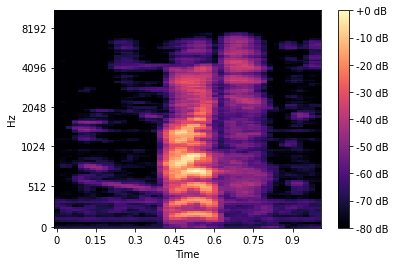

In [8]:
librosa.display.specshow(ac, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [9]:
ac.shape

(128, 44)

In [67]:
asagi=get_spectrogram('C:/Users/sarib/Desktop/Gohm/SpeechRecognition/database/asagi/asagi_AHCG_WFMOQIR.wav')
asagi.shape

(128, 44)

In [68]:
extracted_feataures =[]
for root, directories, files in os.walk(root_path):
    for file_names in files:
        if root is not root_path:
            #print(os.path.join(root,file_names))
            data = get_spectrogram(os.path.join(root,file_names))
            extracted_feataures.append([data,os.path.basename(os.path.normpath(root))])

In [69]:
extracted_feataures_dataframe= pd.DataFrame(extracted_feataures, columns=["melspectrogram", "word"])
extracted_feataures_dataframe.head()

,melspectrogram,word
0,"[[-42.529427, -46.076447, -55.382362, -53.8832...",ac
1,"[[-70.20584, -53.14595, -46.734535, -47.519524...",ac
2,"[[-56.971497, -54.04003, -50.978535, -50.18958...",ac
3,"[[-52.74346, -53.065823, -51.06662, -52.909985...",ac
4,"[[-80.0, -67.5182, -59.17415, -57.237083, -54....",ac


In [70]:
extracted_feataures_dataframe['word'].value_counts()

ac        1952
baslat    1876
asagi     1867
Name: word, dtype: int64

In [71]:
X=np.array(extracted_feataures_dataframe['melspectrogram'].tolist())
Y=np.array(extracted_feataures_dataframe['word'].tolist())

In [72]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y_numerical=to_categorical(labelencoder.fit_transform(Y))

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y_numerical, test_size=0.2, random_state=0)

In [100]:
#INPUT_SHAPE=X_train.shape
INPUT_SHAPE=(128,44,1)

In [75]:
X_test.shape

(1139, 128, 44)

**CNN MODEL**

In [76]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [158]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,44,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,44,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,44,1)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(Y_numerical.shape[1],activation='softmax'))

In [151]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 126, 42, 32)       320       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 63, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 61, 19, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 30, 9, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 28, 7, 64)         36928     
                                                                 
 flatten_18 (Flatten)        (None, 12544)           

In [159]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=0.001))

In [160]:
history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/10
143/143 - 26s - loss: 0.5789 - accuracy: 0.8944 - val_loss: 0.0781 - val_accuracy: 0.9789 - 26s/epoch - 181ms/step
Epoch 2/10
143/143 - 26s - loss: 0.0839 - accuracy: 0.9756 - val_loss: 0.0440 - val_accuracy: 0.9868 - 26s/epoch - 181ms/step
Epoch 3/10
143/143 - 26s - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0808 - val_accuracy: 0.9701 - 26s/epoch - 185ms/step
Epoch 4/10
143/143 - 25s - loss: 0.0435 - accuracy: 0.9879 - val_loss: 0.0393 - val_accuracy: 0.9877 - 25s/epoch - 177ms/step
Epoch 5/10
143/143 - 25s - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0388 - val_accuracy: 0.9877 - 25s/epoch - 177ms/step
Epoch 6/10
143/143 - 32s - loss: 0.0300 - accuracy: 0.9917 - val_loss: 0.0421 - val_accuracy: 0.9860 - 32s/epoch - 227ms/step
Epoch 7/10
143/143 - 26s - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0452 - val_accuracy: 0.9903 - 26s/epoch - 181ms/step
Epoch 8/10
143/143 - 25s - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0392 - val_accuracy: 0.9877 - 25s/epoch - 177

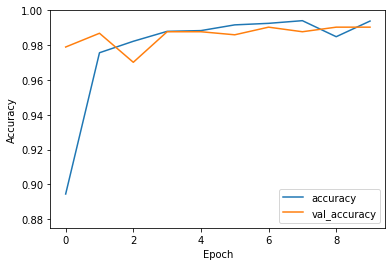

In [175]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.875, 1])
plt.legend(loc='lower right')

In [164]:
print("Test Score: ", model.evaluate(X_test,Y_test))
print("Train Score: ", model.evaluate(X_train,Y_train))

36/36 [==============================] - 2s 53ms/step - loss: 0.0439 - accuracy: 0.9903
Test Score:  [0.043857429176568985, 0.990342378616333]
143/143 [==============================] - 8s 59ms/step - loss: 0.0188 - accuracy: 0.9943
Train Score:  [0.018814222887158394, 0.994293212890625]


**PREDICTION WITH DATA**

In [170]:
predictiondata_feataures =[]
counter_true=0
for root, directories, files in os.walk("C:/Users/sarib/Desktop/Gohm/SpeechRecognition/RecordsFromDataset"): 
    for file_names in files:
        if root is not root_path:
            #print(os.path.join(root,file_names) )
            r = get_spectrogram(os.path.join(root,file_names))
            #rl=r.reshape(1,-1)
            rl = r[np.newaxis, ...]
            predicted_label=np.argmax(model.predict(rl), axis=1)
            prediction_class = labelencoder.inverse_transform(predicted_label) 
            predictiondata_feataures.append([os.path.basename(os.path.normpath(root)), prediction_class, predicted_label])
            if os.path.basename(os.path.normpath(root))==prediction_class:
                counter_true+=1

In [171]:
predictiondata_feataures_dataframe= pd.DataFrame(predictiondata_feataures, columns=["actual data", "predicted data", "predicted data code"])
percentage= (counter_true/len(predictiondata_feataures))*100
print("The percantage of the true predicted data: ", percentage,"%")
#predictiondata_feataures_dataframe.to_csv("output.csv")
predictiondata_feataures_dataframe

The percantage of the true predicted data:  88.88888888888889 %


,actual data,predicted data,predicted data code
0,asagi,[asagi],[1]
1,asagi,[asagi],[1]
2,asagi,[asagi],[1]
3,ac,[ac],[0]
4,ac,[ac],[0]
5,ac,[ac],[0]
6,baslat,[baslat],[2]
7,baslat,[baslat],[2]
8,baslat,[asagi],[1]
